In [1]:
 """
Use to be able to retrieve modules and import in core and app directorie
"""
from os import sys, path
sys.path.append(path.dirname(path.dirname(path.abspath("__file__"))))
print(sys.path)

['C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\python36.zip', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\DLLs', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev', '', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib\\site-packages', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib\\site-packages\\win32', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib\\site-packages\\win32\\lib', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib\\site-packages\\Pythonwin', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\krodrigu\\.ipython', 'C:\\Users\\krodrigu\\Desktop\\Stage_Kevin\\Projet\\pyat\\src']


In [2]:
import glob
import datetime
import warnings
import numpy as np
import matplotlib.pyplot as plt

import pyat.core.Utils.MatrixInspector as scope
import pyat.core.Utils.TiffDriver as tiff
import pyat.core.XSF.XSFConstants as XConstants
import stage.DirectorySettings as directories
from stage.Export_Geotiff import Export_File
from stage.NCFileCache import XSFFile
from stage.InsonifiedAreaComputer import InsonifiedAreaComputer

warnings.filterwarnings('ignore')

['C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\python36.zip', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\DLLs', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev', '', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib\\site-packages', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib\\site-packages\\win32', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib\\site-packages\\win32\\lib', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib\\site-packages\\Pythonwin', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\krodrigu\\.ipython', 'C:\\Users\\krodrigu\\Desktop\\Stage_Kevin\\Projet\\pyat\\src', 'C:\\Users\\krodrigu\\Desktop\\Stage_K

In [3]:
reflectivty = "C:/Users/krodrigu/Documents/pyat/reflectivity_dB_2019_11_26_10_44_24.tif"
filename_incidence = "C:/Users/krodrigu/Documents/pyat/incidence_angle_2019_11_26_10_54_58.tif"

In [4]:
reflectivity = tiff.read_tiff(reflectivty)
angle_incidence = tiff.read_tiff(filename_incidence)

In [5]:
reflectivity_mean =np.zeros((reflectivity.shape[1]))
for i in range (reflectivity.shape[1]):
    reflectivity_mean[i] = np.nanmean(reflectivity[:, i])

In [6]:
incidence_mean =np.zeros((angle_incidence.shape[1]))
for i in range (angle_incidence.shape[1]):
    incidence_mean[i] = np.nanmean(angle_incidence[:, i])

In [7]:
sonarscope_reflectivty = ( directories.input_directory + directories.sonarscope_equation +
                             "0032_20180914_183119_ShipName_SSc_Step1_PingBeam_Reflectivity.tif")
ssc_filename_incidence = ( directories.input_directory + directories.sonarscope_equation +
                             "0032_20180914_183119_ShipName_PingBeam_IncidenceAngle.tif")

Mean :  -0.2526475
Max :  103.17929
Min :  -97.531784
Median :  -1.043023
Std :  46.861465
                                      Incidence Angle computed                                      


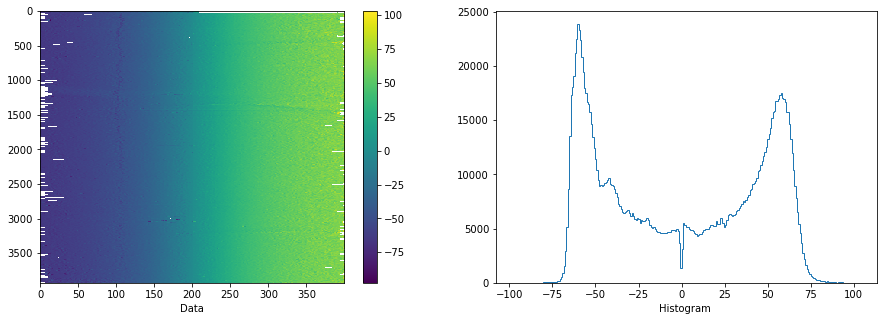

In [8]:
scope.display_geotiff_data(filename_incidence, "Incidence Angle computed", True)

Mean :  0.11074433
Max :  90.55042
Min :  -79.15889
Median :  1.0372596
Std :  50.62329
                                     Incidence Angle sonarscope                                     


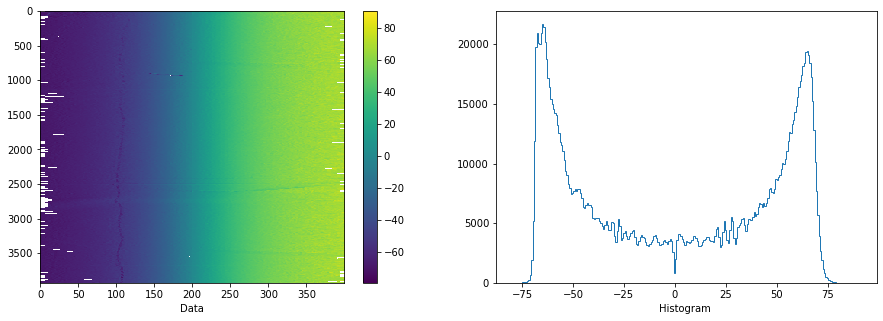

In [9]:
scope.display_geotiff_data(ssc_filename_incidence, "Incidence Angle sonarscope", True)

Mean :  -15.309533
Max :  9.237072
Min :  -52.11527
Median :  -15.355058
Std :  4.4960494
                                       Reflectivity computed                                        


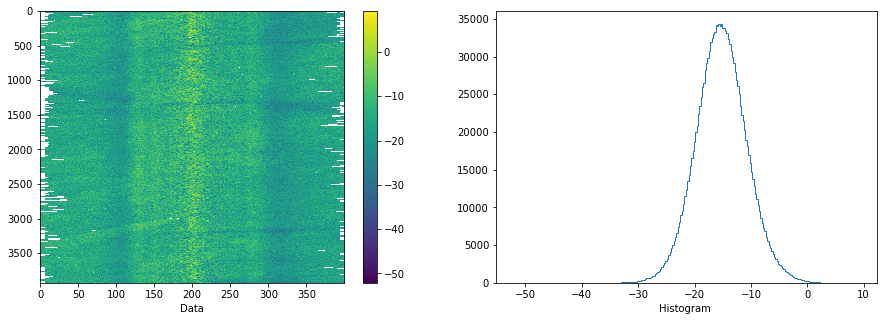

In [10]:
scope.display_geotiff_data(reflectivty, "Reflectivity computed", True)

Mean :  -15.20259
Max :  8.864365
Min :  -49.674374
Median :  -15.355325
Std :  4.6542253
                                    Reflectivity from sonarscope                                    


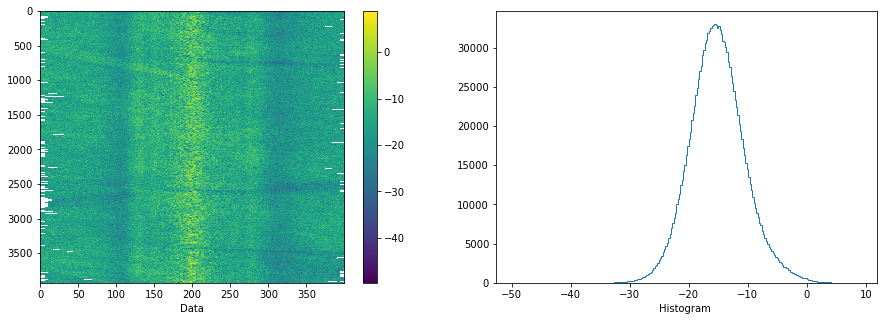

In [19]:
ssc_reflectivity = tiff.read_tiff(sonarscope_reflectivty)
ssc_reflectivity[ssc_reflectivity == 18] = np.nan
scope.display_matrix(ssc_reflectivity, "Reflectivity from sonarscope", True)

Mean :  -0.10777065
Max :  39.15509
Min :  -41.029408
Median :  -0.04263687
Std :  5.332916
                             Difference of reflectivity with sonarscope                             


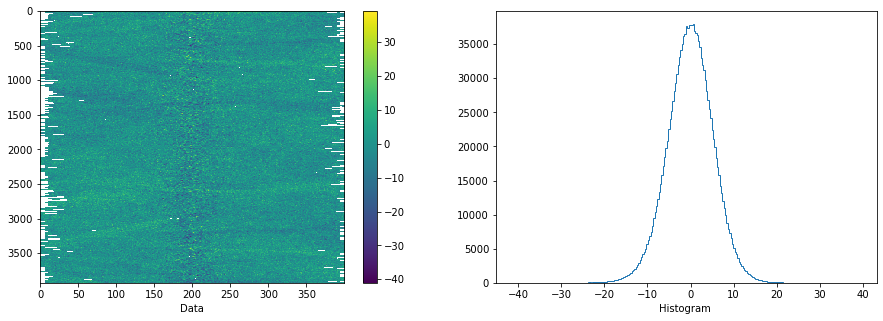

In [20]:
diff_reflectivity = np.abs(ssc_reflectivity)-np.abs(tiff.read_tiff(reflectivty))
scope.display_matrix(diff_reflectivity, "Difference of reflectivity with sonarscope", True)

In [13]:
ssc_reflectivity_mean = np.zeros((ssc_reflectivity.shape[1]))
for i in range (ssc_reflectivity.shape[1]):
    ssc_reflectivity_mean[i] = np.nanmean(ssc_reflectivity[:, i])

In [14]:
ssc_angle_incidence = tiff.read_tiff(ssc_filename_incidence)
ssc_angle_incidence [ssc_angle_incidence == 182] = np.nan
ssc_incidence_mean =np.zeros((ssc_angle_incidence.shape[1]))
for i in range (ssc_angle_incidence.shape[1]):
    ssc_incidence_mean[i] = np.nanmean(ssc_angle_incidence[:, i])

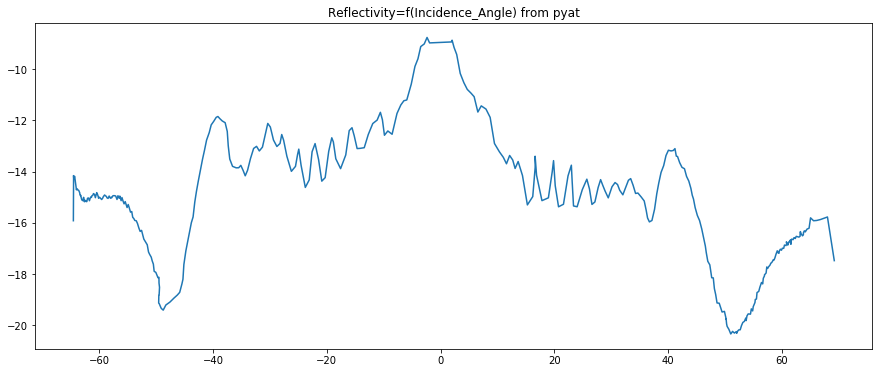

In [15]:
fig = plt.figure(figsize=(15,6))
plt.title('Reflectivity=f(Incidence_Angle) from pyat')
plt.plot(incidence_mean, reflectivity_mean)
plt.show()

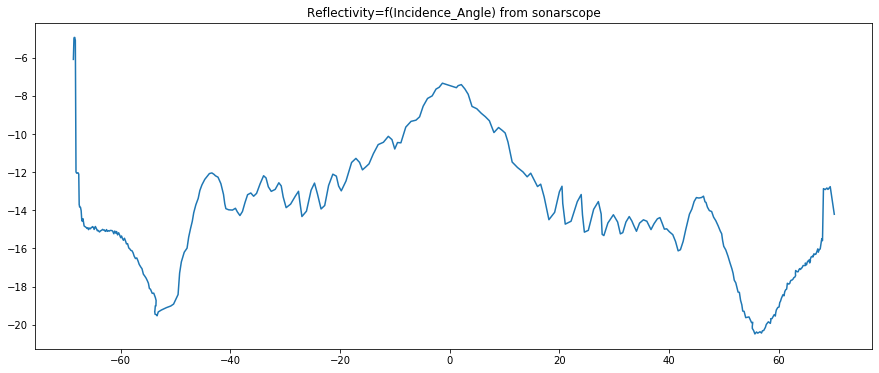

In [16]:
fig = plt.figure(figsize=(15,6))
plt.title('Reflectivity=f(Incidence_Angle) from sonarscope')
plt.plot(ssc_incidence_mean, ssc_reflectivity_mean)
plt.show()

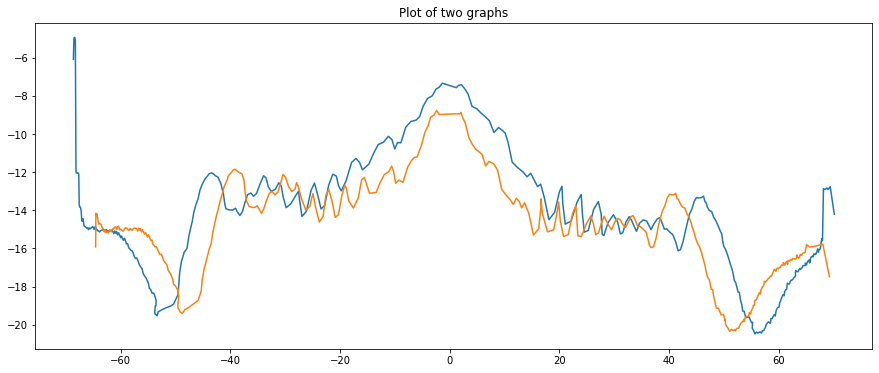

In [17]:
fig = plt.figure(figsize=(15,6))
plt.title('Plot of two graphs')
plt.plot(ssc_incidence_mean, ssc_reflectivity_mean)
plt.plot(incidence_mean, reflectivity_mean)
plt.show()

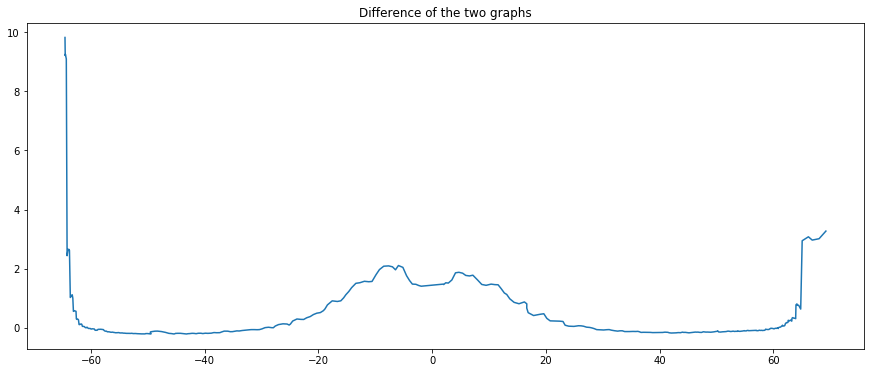

In [18]:
fig = plt.figure(figsize=(15,6))
plt.title('Difference of the two graphs')
plt.plot(incidence_mean, ssc_reflectivity_mean - reflectivity_mean)
plt.show()